## Observations and Insights

## Dependencies and starter code

In [10]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

# Combine the data into a single dataset
merged = pd.merge(mouse_metadata, study_results, on="Mouse ID")
merged.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


## Summary statistics

In [11]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
grp = "Drug Regimen"
aggColumn = 'Tumor Volume (mm3)'
newdf = merged.groupby(grp).agg({aggColumn: [np.mean, np.median, np.var, np.std, st.sem]})
newdf.head()

### NOTE: If you "Restart and run all", this errors out. If you "Restart and clear output" and then manually run cells, it works


Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466

## Bar plots

Text(0, 0.5, 'Number of Data Points')

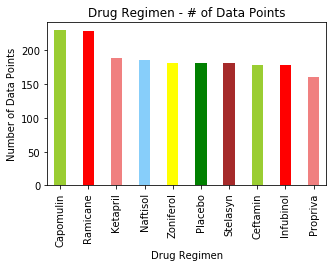

In [12]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas

# Collect the data points 
x = merged.groupby(grp)["Mouse ID"].count()

# convert from series to dataframe
df = pd.DataFrame(x).reset_index()
df.columns = ['Drug Regimen', 'Data Points']
df = df.sort_values('Data Points', ascending = False)

# Assign colors
colors = ["yellowgreen", "red", "lightcoral", "lightskyblue", "yellow", "green", "brown"]

# Dataframe plot
df.plot(kind='bar',
        x='Drug Regimen',
        y='Data Points', 
        color=colors, 
        legend = False, 
        title="Drug Regimen - # of Data Points",
        figsize= (5,3),
        width=0.4
       )

# Give the chart an x label, and y label
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Data Points")

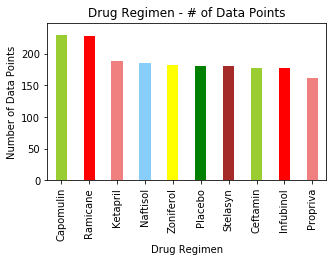

In [4]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot
# Reuse same dataframe + colors from previous

x_axis = df[grp]
tick_locations = [value for value in x_axis]

# Set figure size to adjust for space
plt.figure(figsize=(5,3))

# Tighten up!
plt.xlim(-0.50, len(x_axis)-0.5) # horizontal "fit"
plt.ylim(0, max(df["Data Points"]) + 19) # vertical "fit"

plt.bar(x_axis, 
        df["Data Points"], 
        color=colors, 
        alpha=1, 
        align="center",
        width=0.4
       )

# Twist the labels 
plt.xticks(tick_locations, df[grp], rotation="vertical")

# Give the chart an x label, and y label
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Data Points")
plt.title("Drug Regimen - # of Data Points")
# Pad margins so that markers don't get clipped by the axes
plt.margins(0.2)

# Tweak spacing to prevent clipping of tick-labels
plt.subplots_adjust(bottom=0.15)
plt.show()

## Pie plots

[Text(0, 0.5, '')]

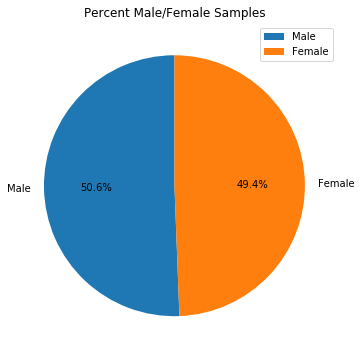

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
grp2 = "Sex"

# Collect the data points 
x = merged.groupby(grp2)["Mouse ID"].count()

# convert from series to dataframe
df = pd.DataFrame(x).reset_index()
df.columns = ['Sex', 'Mice']
df = df.sort_values('Mice', ascending = False)
df.index = df[grp2]

plot = df.plot(kind='pie'
        , y='Mice'
        , figsize=(6, 6)
        , autopct='%1.1f%%'
        , startangle=90
        , legend = True
        , title="Percent Male/Female Samples"
       )
plot.set(ylabel="")

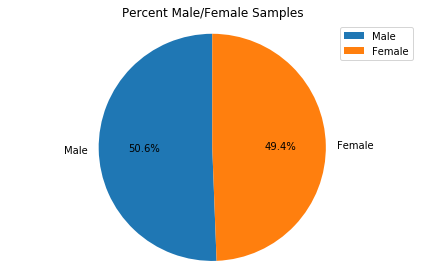

In [6]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

# Colors
# colors = ["#E13F29", "#D69A80", "#D63B59", "#AE5552", "#CB5C3B", "#EB8076", "#96624E"]

# Create a pie chart
plt.pie(
    # using data total)arrests
    df['Mice'],
    # with the labels being officer names
    labels=df[grp2],
    # with no shadows
    shadow=False,
    # with colors
    # colors=colors,
    # with the start angle at 90%
    startangle=90,
    # with the percent listed as a fraction
    autopct='%1.1f%%'
    )

# View the plot drop above
plt.axis('equal')

# Set the title and legend
plt.legend(df[grp2])
plt.title("Percent Male/Female Samples")

# View the plot
plt.tight_layout()
plt.show()

## Quartiles, outliers and boxplots

In [16]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. 
# Calculate the IQR and quantitatively determine if there are any potential outliers. 

# Readme: Calculate the final tumor volume of each mouse across four of the most promising treatment regimens: 
#    Capomulin, Ramicane, Infubinol, and Ceftamin. 

# Filter for the required regimens
subset = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
step11 = merged[merged[grp].isin(subset)]


# Now agg the tumor vol
step11agg = step11.groupby(grp).agg({aggColumn: [np.sum]})

# Calculate the quartiles and IQR and quantitatively determine if there are any potential outliers 
# across all four treatment regimens.

quartiles = step11[aggColumn].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of tumor volume is: {lowerq}")
print(f"The upper quartile of tumor volume is: {upperq}")
print(f"The interquartile range of tumor volume is: {iqr}")
print(f"The the median of tumor volume is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

print("")
print("------------------------")
print("Outliers - below lower bound:")
print("------------------------")
print(step11[(step11[aggColumn] < lower_bound)].head())

print("")
print("------------------------")
print("Outliers - above upper bound:")
print("------------------------")
print(step11[(step11[aggColumn] > upper_bound)].head())


The lower quartile of tumor volume is: 40.2201707875
The upper quartile of tumor volume is: 50.356470630000004
The interquartile range of tumor volume is: 10.136299842500001
The the median of tumor volume is: 45.0 
Values below 25.01572102375 could be outliers.
Values above 65.56092039375001 could be outliers.

------------------------
Outliers - below lower bound:
------------------------
   Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
8      k403     Ramicane    Male          21          16         40   
9      k403     Ramicane    Male          21          16         45   
19     s185    Capomulin  Female           3          17         45   

    Tumor Volume (mm3)  Metastatic Sites  
8            24.365505                 1  
9            22.050126                 1  
19           23.343598                 1  

------------------------
Outliers - above upper bound:
------------------------
    Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint 

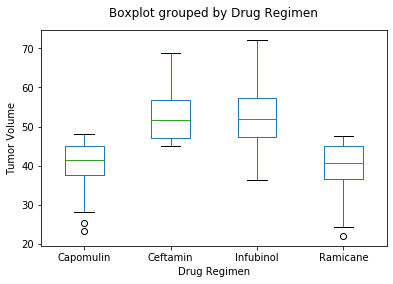

In [24]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
ax1 = step11.boxplot(
    by =grp
    , column =[aggColumn]
    , grid = False
    , showfliers = True
)

ax1.set_title('')
ax1.set_ylabel('Tumor Volume')
plt.show()

## Line and scatter plots

In [ ]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

In [ ]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

In [ ]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen